# Network analysis of London Public transport 

### Coursework_1 = 	A mid-term coursework for the Network Science part of the course (15% of final grade)

## Table of Contents

| Sno | Name |
| --- | --- |
| 1. | Import Libraries |
|2. | Read and View Datasets |
|3. | Connections(Links) and Characters of the dataset |
|4. | Visualization of the network through the random graph |
|5. | Graph Info |
|6. | Graph measurements |
|7. | Visualization of the network using Pyvis library |
|8. | Typical Node Degree |
|9. | Wrangle Connected Components |
|10. | Degree centrality |
|11. | Function to get top stations |
|12. | Degree Centrality DESC |
|13. | Betweenness Centrality DESC Order |
|14. | Closeness centrality |
|15. | Eigenvector centrality (Extra) |
|16. | List of Top 10 stations by each required centrality measure |
|17. | Metrics and tests |
|18. | We remove nodes by Betweenness Centrality by DESC Order |
|19. | Sources Used |

#### 1) Import Libraries

In [2]:
pip install nxviz

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [344]:
import pandas as pd
import numpy as np
from pathlib import Path
import requests
import networkx as nx
import nxviz as nv
from matplotlib import pyplot as plt
from datetime import datetime, date
from pprint import pprint as pp
from itertools import combinations
import random
from collections import Counter, defaultdict

#### 2) Read and View Datasets

In [345]:
df = pd.read_csv('london_transport_raw.edges', header = 0, names = ['line', 'source', 'target'], keep_default_na=False,
                 sep = ' ')

In [346]:
df

,line,source,target
0,bakerloo,kenton,southkenton
1,bakerloo,southkenton,northwembley
2,bakerloo,northwembley,wembleycentral
3,bakerloo,wembleycentral,stonebridgepark
4,bakerloo,stonebridgepark,harlesden
...,...,...,...
497,dlr,poplar,blackwall
498,dlr,blackwall,eastindia
499,dlr,eastindia,canningtown
500,dlr,bank,shadwell


### 3) Connections(Links) and Characters of the dataset

In [347]:
# import
import networkx as nx
# load pandas df as networkx graph
G = nx.from_pandas_edgelist(df, 
                            source='source', 
                            target='target', 
                            edge_attr='line')
print("No of unique characters:", len(G.nodes))
print("No of connections:", len(G.edges))

No of unique characters: 369
No of connections: 430


### 4) Visualization of the network through the random graph

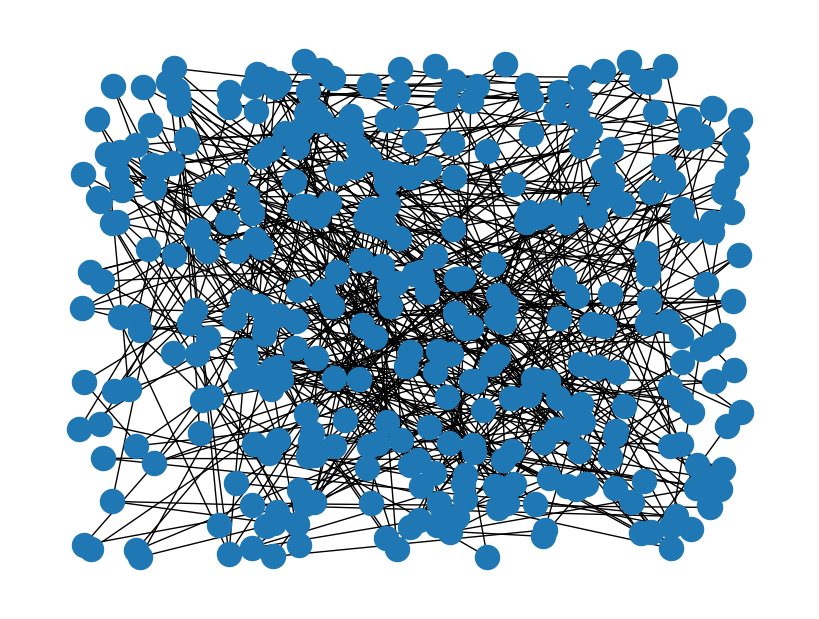

In [348]:
# all graph options
graphs_viz_options = [nx.draw, nx.draw_networkx, nx.draw_circular, nx.draw_kamada_kawai, nx.draw_random, nx.draw_shell, nx.draw_spring]

# plot graph option
selected_graph_option = 4

# plot
plt.figure(figsize=(8,6), dpi=100) 
graphs_viz_options[selected_graph_option](G)

### 5) Graph Info

In [349]:
#Graph Info
print(nx.info(G))

#Check if graph is Directed - True/False
print(nx.is_directed(G))

#Count of Nodes
print(nx.number_of_nodes(G))

#Count of Edges
print(nx.number_of_edges(G))

Graph with 369 nodes and 430 edges
False
369
430


<ipython-input-349-1d5f8af60e7b>:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [350]:
# Average Degree of the network
print('Average Degree of the network: ',nx.number_of_nodes(G)/nx.number_of_edges(G))

Average Degree of the network:  0.858139534883721


In [351]:
nx.is_weighted(G)

False

### 6) Graph measurements 

In [352]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.006333215506068104


- Graph is Undirected and Unweighted
- The density of the network is  0.06
- Average Degree of the Network is 0.858.

In [353]:
# Retrieve the data (using Python list comprhension and list slicing to remove the header row, see footnote 3)
nodes = [n for n in df][1:]
nodes

['source', 'target']

In [354]:
node_names = [n[0] for n in nodes]
node_names

['s', 't']

In [355]:
edges = [tuple(e) for e in df][1:] # Retrieve the data
edges

[('s', 'o', 'u', 'r', 'c', 'e'), ('t', 'a', 'r', 'g', 'e', 't')]

In [356]:
pip install pyvis

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### 7) Visualization of the network using Pyvis library

In [357]:
from pyvis.network import Network
net = Network()
got_net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")

# set the physics layout of the network
got_net.barnes_hut()

sources = df['source']
targets = df['target']
weights = df['line']

edge_data = zip(sources, targets, weights)

for e in edge_data:
                src = e[0]
                dst = e[1]
                w = e[2]

                got_net.add_node(src, src, title=src)
                got_net.add_node(dst, dst, title=dst)
                got_net.add_edge(src, dst, value=w)

neighbor_map = got_net.get_adj_list()

# add neighbor data to node hover data
for node in got_net.nodes:
                node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
                node["value"] = len(neighbor_map[node["id"]])

a = got_net.show("london_transport_raw.html")

In [14]:
a

### 8) Typical Node Degree

In [358]:
# Degree
degree_1 = [val for (node, val) in G.degree()]
# Sorted degree
degrees = [val for (node, val) in sorted(G.degree(), key=lambda pair: pair[0])]

In [359]:
degrees

[2,
 2,
 4,
 2,
 3,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 7,
 2,
 6,
 2,
 3,
 2,
 3,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 4,
 4,
 6,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 6,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 3,
 1,
 3,
 2,
 2,
 4,
 1,
 5,
 2,
 2,
 2,
 3,
 4,
 2,
 4,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 6,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 1,
 3,
 2,
 2,
 1,
 4,
 2,
 3,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 7,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 1,
 2,
 2,
 3,
 2,
 2,
 5,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 1,
 2,
 4,
 3,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 6,
 6,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 4,
 2,
 2,


(array([ 29., 263.,   0.,  33.,   0.,  28.,   5.,   0.,   8.,   3.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

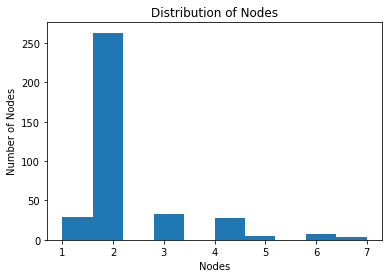

In [360]:
from matplotlib import pyplot as plt
plt.title('Distribution of Nodes')
plt.xlabel('Nodes')
plt.ylabel('Number of Nodes')
plt.hist(degrees)

In [361]:
components = nx.connected_components(G)
for c in components:
    print(c)

{'westferry', 'brondesburypark', 'oxfordcircus', 'bromley-by-bow', 'eastfinchley', 'mileend', 'homerton', 'eastindia', 'hatchend', 'dagenhamheathway', 'shadwell', 'shepherdsbushmarket', 'anerley', 'loughton', 'watfordhighstreet', 'euston', 'wanstead', 'newcross', 'chalfont&latimer', 'langdonpark', 'archway', 'towerhill', 'southwimbledon', 'angel', 'maidavale', 'queenspark', 'totteridge&whetstone', 'stratford', 'pinner', 'finchleyroad', 'peckhamrye', 'finchleyroad&frognal', 'wembleycentral', 'dalstonkingsland', 'amersham', 'embankment', 'walthamstowqueensroad', 'greenwich', 'kensalgreen', 'stockwell', 'stanmore', 'stratfordhighstreet', 'kewgardens', 'sevensisters', 'bayswater', 'morningtoncrescent', 'arnosgrove', 'greenford', 'denmarkhill', 'westindiaquay', 'elephant&castle', 'balham', 'hillingdon', 'heathrowterminals123', 'debden', 'kingsbury', 'kensington(olympia)', 'hangerlane', 'limehouse', 'woodford', 'rodingvalley', 'moorgate', 'bostonmanor', 'southfields', 'mansionhouse', 'hampst

### 9) Wrangle Connected Components

In [362]:
# Connected components are sorted in descending order of their size 
cam_net_components= (G.subgraph(c) for c in nx.connected_components(G))
cam_net_components = list(cam_net_components)
cam_net_mc= cam_net_components[0] 

### 10) Degree centrality

In [363]:
deg_cen = nx.degree_centrality(cam_net_mc)
print(deg_cen)

{'kenton': 0.005434782608695652, 'southkenton': 0.005434782608695652, 'northwembley': 0.005434782608695652, 'wembleycentral': 0.005434782608695652, 'stonebridgepark': 0.005434782608695652, 'harlesden': 0.005434782608695652, 'willesdenjunction': 0.01358695652173913, 'kensalgreen': 0.005434782608695652, 'queenspark': 0.008152173913043478, 'kilburnpark': 0.005434782608695652, 'maidavale': 0.005434782608695652, 'warwickavenue': 0.005434782608695652, 'paddington': 0.016304347826086956, 'edgwareroad(bakerlooline)': 0.005434782608695652, 'marylebone': 0.005434782608695652, 'bakerstreet': 0.019021739130434784, 'regentspark': 0.005434782608695652, 'oxfordcircus': 0.016304347826086956, 'piccadillycircus': 0.010869565217391304, 'charingcross': 0.008152173913043478, 'embankment': 0.010869565217391304, 'waterloo': 0.016304347826086956, 'lambethnorth': 0.005434782608695652, 'elephant&castle': 0.008152173913043478, 'westruislip': 0.002717391304347826, 'ruislipgardens': 0.005434782608695652, 'southrui

#### Eigenvector centrality

In [364]:
# Eigenvector centrality 
eig_cen = nx.eigenvector_centrality(cam_net_mc)
eig_cen

{'kenton': 7.040011246663766e-07,
 'southkenton': 2.4655738809198382e-06,
 'northwembley': 8.635748292786205e-06,
 'wembleycentral': 3.0249112013954964e-05,
 'stonebridgepark': 0.00010596208964896189,
 'harlesden': 0.0003712009596794233,
 'willesdenjunction': 0.0013004228710588853,
 'kensalgreen': 0.0009817720891063856,
 'queenspark': 0.002419634062413101,
 'kilburnpark': 0.001536696030703699,
 'maidavale': 0.0034035374489395556,
 'warwickavenue': 0.011360850096386177,
 'paddington': 0.039647685503389936,
 'edgwareroad(bakerlooline)': 0.02668268630041881,
 'marylebone': 0.06146373247818583,
 'bakerstreet': 0.20622594406579223,
 'regentspark': 0.1591423143732375,
 'oxfordcircus': 0.39681579789563465,
 'piccadillycircus': 0.30975629560797274,
 'charingcross': 0.18061185439308267,
 'embankment': 0.16866035147340858,
 'waterloo': 0.18714423971611505,
 'lambethnorth': 0.06001969887935925,
 'elephant&castle': 0.04026019480381857,
 'westruislip': 8.42124661777609e-09,
 'ruislipgardens': 3.187

#### Closeness centrality 

In [365]:
# Closeness centrality 
clo_cen = nx.closeness_centrality(cam_net_mc) 
clo_cen

{'kenton': 0.06016020925290175,
 'southkenton': 0.06384455239417071,
 'northwembley': 0.0679844818030667,
 'wembleycentral': 0.07266982622432859,
 'stonebridgepark': 0.07801568793724825,
 'harlesden': 0.08417200365965233,
 'willesdenjunction': 0.09133780094316207,
 'kensalgreen': 0.0916791230692576,
 'queenspark': 0.09397344228804903,
 'kilburnpark': 0.08820709491850431,
 'maidavale': 0.08596122401308105,
 'warwickavenue': 0.08984375,
 'paddington': 0.09725158562367865,
 'edgwareroad(bakerlooline)': 0.09482092244266942,
 'marylebone': 0.09945945945945946,
 'bakerstreet': 0.10810810810810811,
 'regentspark': 0.10363277949873276,
 'oxfordcircus': 0.10952380952380952,
 'piccadillycircus': 0.10433796427558832,
 'charingcross': 0.10185441461389427,
 'embankment': 0.10374964758951226,
 'waterloo': 0.10868281157708211,
 'lambethnorth': 0.09815950920245399,
 'elephant&castle': 0.09227683049147442,
 'westruislip': 0.049047047847527656,
 'ruislipgardens': 0.0515695067264574,
 'southruislip': 0.0

#### Betweenness centrality 

In [366]:
#Betweenness centrality 
bet_cen = nx.betweenness_centrality(cam_net_mc)
bet_cen

{'kenton': 0.03742151403862102,
 'southkenton': 0.04264897523990049,
 'northwembley': 0.047846819097263356,
 'wembleycentral': 0.05301504561070963,
 'stonebridgepark': 0.05815365478023931,
 'harlesden': 0.06326264660585239,
 'willesdenjunction': 0.1582391875177829,
 'kensalgreen': 0.09462435415188343,
 'queenspark': 0.10167802430493447,
 'kilburnpark': 0.0044408210209803635,
 'maidavale': 0.0029515093562599774,
 'warwickavenue': 0.005001822877000581,
 'paddington': 0.05936473970585741,
 'edgwareroad(bakerlooline)': 0.0011883959246534771,
 'marylebone': 0.004002043596730245,
 'bakerstreet': 0.21915043621261737,
 'regentspark': 0.011450364857470063,
 'oxfordcircus': 0.06084848583145574,
 'piccadillycircus': 0.007477330124232153,
 'charingcross': 0.005440239700472489,
 'embankment': 0.023039759622362453,
 'waterloo': 0.22548275925393557,
 'lambethnorth': 0.0024415269010103716,
 'elephant&castle': 0.00443396319551396,
 'westruislip': 0.0,
 'ruislipgardens': 0.005434782608695652,
 'southrui

### 11) Function to get top stations

In [367]:
def get_top_keys (dictionary, top):
    items = dictionary.items() 
    sorted(items,reverse=True, key=lambda x: x[1]) 
    return map(lambda x: x[0], items[:top])
import operator

### 12) Degree Centrality DESC

In [368]:
sorted_d = dict( sorted(deg_cen.items(), key=operator.itemgetter(1),reverse=True))
print('Sort between Centrality Stations by Descending order : ',sorted_d)

Sort between Centrality Stations by Descending order :  {'bakerstreet': 0.019021739130434784, 'stratford': 0.019021739130434784, 'kingscrossstpancras': 0.019021739130434784, 'paddington': 0.016304347826086956, 'oxfordcircus': 0.016304347826086956, 'waterloo': 0.016304347826086956, 'bank': 0.016304347826086956, 'earlscourt': 0.016304347826086956, 'westham': 0.016304347826086956, 'greenpark': 0.016304347826086956, 'canningtown': 0.016304347826086956, 'willesdenjunction': 0.01358695652173913, 'liverpoolstreet': 0.01358695652173913, 'turnhamgreen': 0.01358695652173913, 'euston': 0.01358695652173913, 'shadwell': 0.01358695652173913, 'piccadillycircus': 0.010869565217391304, 'embankment': 0.010869565217391304, 'shepherdsbush': 0.010869565217391304, 'nottinghillgate': 0.010869565217391304, 'bondstreet': 0.010869565217391304, 'tottenhamcourtroad': 0.010869565217391304, 'holborn': 0.010869565217391304, 'mileend': 0.010869565217391304, 'victoria': 0.010869565217391304, 'westminster': 0.010869565

### 13) Betweenness Centrality DESC Order

In [369]:
sorted_d = dict( sorted(bet_cen.items(), key=operator.itemgetter(1),reverse=True))
print('Sort between Centrality Stations by Descending order : ',sorted_d)

Sort between Centrality Stations by Descending order :  {'bank': 0.23987714098482962, 'waterloo': 0.22548275925393557, 'kingscrossstpancras': 0.22335320232525835, 'greenpark': 0.21981973398200727, 'bakerstreet': 0.21915043621261737, 'euston': 0.2067230343338031, 'stratford': 0.20093409224251169, 'westminster': 0.19579812871151267, 'finchleyroad': 0.17714428074130747, 'liverpoolstreet': 0.1595098247475779, 'willesdenjunction': 0.1582391875177829, 'bondstreet': 0.15812277880605086, 'highbury&islington': 0.15122750908906277, 'mileend': 0.14642559206480812, 'canadawater': 0.14623207445518208, 'wembleypark': 0.1450471221344045, 'bethnalgreen': 0.1388927379683066, 'earlscourt': 0.12538745207786234, 'canarywharf': 0.11374946406710995, 'westham': 0.11306012038745136, 'prestonroad': 0.11239646857834873, 'harrow-on-the-hill': 0.11188556939578742, 'northwickpark': 0.10813157105435868, 'surreyquays': 0.10480791742120366, 'camdentown': 0.10453441535363109, 'canningtown': 0.10400317187649855, 'south

### 14) Closeness centrality

In [370]:
sorted_d = dict( sorted(clo_cen.items(), key=operator.itemgetter(1),reverse=True))
print('Sort between Centrality Stattions by Descending order : ',sorted_d)

Sort between Centrality Stattions by Descending order :  {'greenpark': 0.11295273173726213, 'westminster': 0.11004784688995216, 'bondstreet': 0.10994920824619062, 'kingscrossstpancras': 0.10988354732756046, 'oxfordcircus': 0.10952380952380952, 'bank': 0.10871491875923191, 'waterloo': 0.10868281157708211, 'bakerstreet': 0.10810810810810811, 'euston': 0.10710128055878929, 'victoria': 0.1067595010153757, 'farringdon': 0.10666666666666667, 'angel': 0.10666666666666667, 'hydeparkcorner': 0.10586881472957423, 'moorgate': 0.10517290654472707, 'barbican': 0.10472396129766648, 'oldstreet': 0.10472396129766648, 'warrenstreet': 0.10454545454545454, 'liverpoolstreet': 0.10445642917967642, 'highbury&islington': 0.10442678774120318, 'piccadillycircus': 0.10433796427558832, 'eustonsquare': 0.10433796427558832, 'holborn': 0.10380818053596615, 'embankment': 0.10374964758951226, 'stjamesspark': 0.10374964758951226, 'regentspark': 0.10363277949873276, 'tottenhamcourtroad': 0.10354530106921778, 'greatport

### 15) Eigenvector centrality (Extra)

In [371]:
sorted_d = dict( sorted(eig_cen.items(), key=operator.itemgetter(1),reverse=True))
print('Sort between Centrality Stattions by Descending order : ',sorted_d)

Sort between Centrality Stattions by Descending order :  {'oxfordcircus': 0.39681579789563465, 'greenpark': 0.39036243116617075, 'piccadillycircus': 0.30975629560797274, 'bondstreet': 0.2835513647087156, 'westminster': 0.22314485167327802, 'tottenhamcourtroad': 0.20996506946345467, 'bakerstreet': 0.20622594406579223, 'leicestersquare': 0.20596237720977173, 'waterloo': 0.18714423971611505, 'charingcross': 0.18061185439308267, 'embankment': 0.16866035147340858, 'regentspark': 0.1591423143732375, 'victoria': 0.15333350165683376, 'warrenstreet': 0.1508754113404694, 'bank': 0.12596196414676064, 'hydeparkcorner': 0.11258508838099804, 'stjamesspark': 0.0993563926566103, 'holborn': 0.09761573279629018, 'goodgestreet': 0.09522593944206971, 'marblearch': 0.08105823611913862, 'coventgarden': 0.08011501986626235, 'euston': 0.07967143762928441, 'finchleyroad': 0.07854035934066812, 'edgwareroad(circleline)': 0.07109116829579759, 'liverpoolstreet': 0.06902640842223604, 'southwark': 0.0659697002024216

### 16) List of Top 10 stations by each required centrality measure

In [372]:
## Create Lists
Closeness_stations = ["greenpark",
"westminster",
"bondstreet",
"kingscrossstpancra",
"oxfordcircus",
"bank",
"waterloo",
"bakerstreet",
"euston",
"victoria"
                     ]

Degree_Stations  = ["bakerstreet"
"stratford",
"kingscrossstpancras",
"paddington",
"oxfordcircus",
"waterloo",
"bank",
"earlscourt",
"westham",
"greenpark"
                    ]

Betweeness_Stations = ["bank",

"kingscrossstpancras",
"greenpark",
"bakerstreet",
"euston",
"stratford",
"westminster",
"finchleyroad",
"liverpoolstreet"
                      ]

In [216]:
pip install matplotlib-venn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


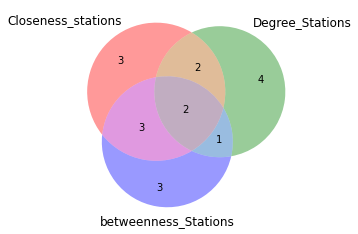

In [373]:
# Venn Diagram to display relationship
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

set1 = set(Closeness_stations)
set2 = set(Degree_Stations)
set3 = set(Betweeness_Stations)

venn3([set1, set2, set3], ('Closeness_stations', 'Degree_Stations', 'betweenness_Stations'))

plt.show()

- 3 different stations in Betweenness centrality not connected to others.

### 14) Node degree for intersection

In [374]:
def avg_neigh_degree(g): 
    return dict((n,float(sum(g.degree(i) for i in g[n]))/ g.degree(n)) 
for n in g.nodes() if g.degree(n))

In [375]:
avg_neigh_degree(G)

{'kenton': 2.0,
 'southkenton': 2.0,
 'northwembley': 2.0,
 'wembleycentral': 2.0,
 'stonebridgepark': 2.0,
 'harlesden': 3.5,
 'willesdenjunction': 2.4,
 'kensalgreen': 4.0,
 'queenspark': 2.0,
 'kilburnpark': 2.5,
 'maidavale': 2.0,
 'warwickavenue': 4.0,
 'paddington': 2.1666666666666665,
 'edgwareroad(bakerlooline)': 4.0,
 'marylebone': 4.5,
 'bakerstreet': 2.7142857142857144,
 'regentspark': 6.5,
 'oxfordcircus': 3.8333333333333335,
 'piccadillycircus': 4.75,
 'charingcross': 4.0,
 'embankment': 3.75,
 'waterloo': 3.5,
 'lambethnorth': 4.5,
 'elephant&castle': 2.3333333333333335,
 'westruislip': 2.0,
 'ruislipgardens': 1.5,
 'southruislip': 2.0,
 'northolt': 2.0,
 'greenford': 2.0,
 'perivale': 2.0,
 'hangerlane': 2.5,
 'northacton': 2.0,
 'westacton': 2.5,
 'ealingbroadway': 2.5,
 'eastacton': 2.5,
 'whitecity': 3.0,
 'shepherdsbush': 3.0,
 'hollandpark': 4.0,
 'nottinghillgate': 2.25,
 'queensway': 3.0,
 'lancastergate': 2.0,
 'marblearch': 3.0,
 'bondstreet': 5.25,
 'tottenhamc

In [376]:
c = avg_neigh_degree(G)

In [377]:
df = pd.DataFrame(list(c.items()),columns = ['Station','avg_neigh_degree']) 
df

,Station,avg_neigh_degree
0,kenton,2.0
1,southkenton,2.0
2,northwembley,2.0
3,wembleycentral,2.0
4,stonebridgepark,2.0
...,...,...
364,towergateway,5.0
365,limehouse,4.0
366,westferry,3.0
367,blackwall,3.0


In [378]:
df = df[df.avg_neigh_degree >= 2.0]

In [379]:
df

,Station,avg_neigh_degree
0,kenton,2.0
1,southkenton,2.0
2,northwembley,2.0
3,wembleycentral,2.0
4,stonebridgepark,2.0
...,...,...
364,towergateway,5.0
365,limehouse,4.0
366,westferry,3.0
367,blackwall,3.0


- 348 components are connected to at least 2 stations.

In [380]:
print((348/369)*100)

94.3089430894309


### 15) Shortest Average Path length 

In [381]:
print(nx.average_shortest_path_length(G))

13.732738305643926


#### Shortest path of Betweenness centrality by Desc

In [382]:
bet_cen_top = nx.betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None)

In [383]:
sorted_d = dict( sorted(bet_cen_top.items(), key=operator.itemgetter(1),reverse=True))
print('Sort between Centrality Stations by Descending order : ',sorted_d)

Sort between Centrality Stations by Descending order :  {'bank': 0.23987714098482962, 'waterloo': 0.22548275925393557, 'kingscrossstpancras': 0.22335320232525835, 'greenpark': 0.21981973398200727, 'bakerstreet': 0.21915043621261737, 'euston': 0.2067230343338031, 'stratford': 0.20093409224251169, 'westminster': 0.19579812871151267, 'finchleyroad': 0.17714428074130747, 'liverpoolstreet': 0.1595098247475779, 'willesdenjunction': 0.1582391875177829, 'bondstreet': 0.15812277880605086, 'highbury&islington': 0.15122750908906277, 'mileend': 0.14642559206480812, 'canadawater': 0.14623207445518208, 'wembleypark': 0.1450471221344045, 'bethnalgreen': 0.1388927379683066, 'earlscourt': 0.12538745207786234, 'canarywharf': 0.11374946406710995, 'westham': 0.11306012038745136, 'prestonroad': 0.11239646857834873, 'harrow-on-the-hill': 0.11188556939578742, 'northwickpark': 0.10813157105435868, 'surreyquays': 0.10480791742120366, 'camdentown': 0.10453441535363109, 'canningtown': 0.10400317187649855, 'south

 #### kingscrossstpancras to greenpark

In [384]:
p = nx.shortest_path_length(G, source='kingscrossstpancras')

In [385]:
p['greenpark']

4

 #### Waterloo to Baker Street

In [386]:
p = nx.shortest_path_length(G, source='waterloo')

In [387]:
p['bakerstreet']

4

 #### Green Park to Bank 

In [388]:
p = nx.shortest_path_length(G, source='greenpark')

In [389]:
p['bank']

3

 #### Baker Street to Kings Cross tpancras

In [390]:
p = nx.shortest_path_length(G, source='bakerstreet')

In [391]:
p['kingscrossstpancras']

3

### 16) Metrics and tests

#### Effeciency measures

In [392]:
nx.local_efficiency(G)

0.029629629629629634

In [393]:
nx.global_efficiency(G)

0.10144149087215806

### 17) We remove nodes by Degree Centrality by DESC Order

In [327]:
Degree_Stations  = ["bakerstreet"
"stratford",
"kingscrossstpancras",
"paddington",
"oxfordcircus",
"waterloo",
"bank",
"earlscourt",
"westham",
"greenpark"
                    ]

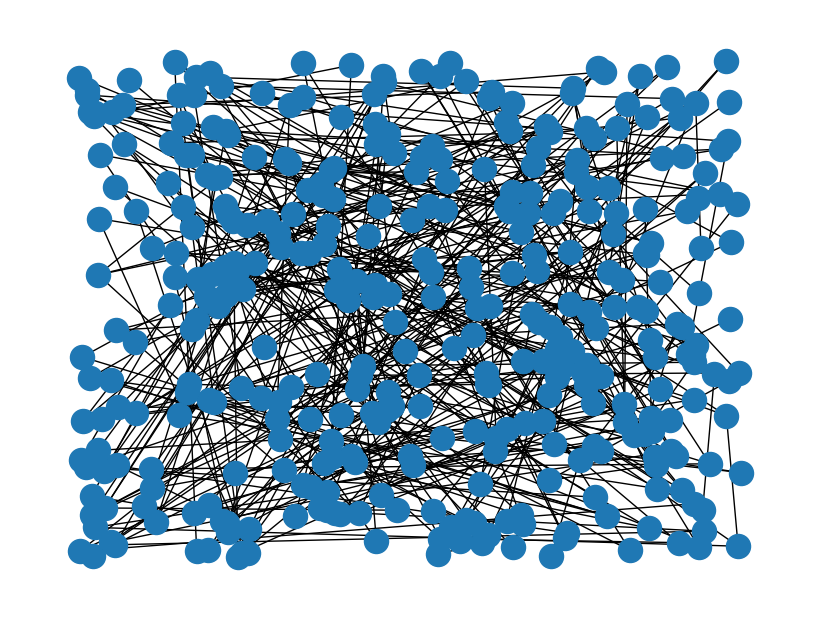

In [328]:
G.remove_node('bakerstreet')
G.remove_node('kingscrossstpancras')
G.remove_node('paddington')
G.remove_node('oxfordcircus')
G.remove_node('waterloo')
G.remove_node('bank')
G.remove_node('earlscourt')
G.remove_node('westham')
G.remove_node('greenpark')
# plot
plt.figure(figsize=(8,6), dpi=100) 
graphs_viz_options[selected_graph_option](G)

- After Removing Nodes from Degree Centrality by their Descing order We can see that while the network looks weaker but in order to check for vulnerability we have to further test it.

In [329]:
#Graph Info
print(nx.info(G))

#Check if graph is Directed - True/False
print(nx.is_directed(G))

#Count of Nodes
print(nx.number_of_nodes(G))

#Count of Edges
print(nx.number_of_edges(G))

Graph with 360 nodes and 376 edges
False
360
376


<ipython-input-329-1d5f8af60e7b>:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [343]:
print(((376-430)/430)*100)

-12.558139534883722


- its edges have Decreased by 12.56%.

In [338]:
nx.local_efficiency(G)

0.01833333333333333

In [404]:
print((0.0183-0.029/0.029)*100)

-98.17


- Local efficiency has decreased by 98.17%.

In [330]:
nx.global_efficiency(G)

0.07323908088112503

In [340]:
print((0.073-0.101/0.101)*100)

-92.7


- Global efficiency has decreased by 92.7%.

#### Metrics of removing nodes by Decreasing Centrality.

In [334]:
# Average Degree of the network
print('Average Degree of the network: ',nx.number_of_nodes(G)/nx.number_of_edges(G))

Average Degree of the network:  0.9574468085106383


In [335]:
# change in Degree
print((( 0.9574468085106383-0.858139534883721)/0.858139534883721)*100)

11.572392319667879


- Average Degree has improved by 11.57%.

In [336]:
nx.is_weighted(G)

False

- The Network G is still not weighted

### 18) We remove nodes by Betweenness Centrality by DESC Order

In [399]:
Betweeness_Stations = ["bank",

"kingscrossstpancras",
"greenpark",
"bakerstreet",
"euston",
"stratford",
"westminster",
"finchleyroad",
"liverpoolstreet"
                      ]


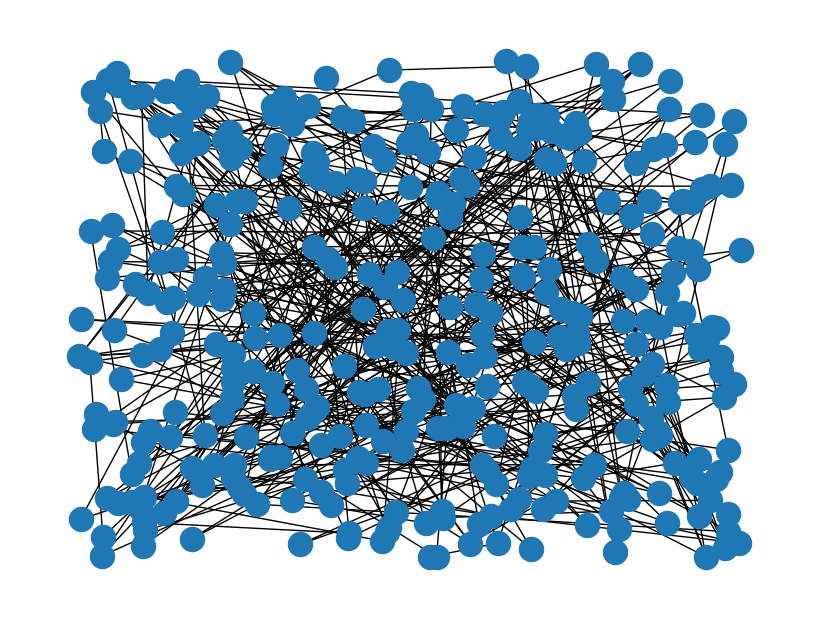

In [400]:
# Remove nodes
G.remove_node("bank")
G.remove_node("kingscrossstpancras")
G.remove_node("greenpark")
G.remove_node("bakerstreet")
G.remove_node("euston")
G.remove_node("stratford")
G.remove_node("westminster")
G.remove_node("finchleyroad")
G.remove_node("liverpoolstreet")
# plot
plt.figure(figsize=(8,6), dpi=100) 
graphs_viz_options[selected_graph_option](G)

In [401]:
#Graph Info
print(nx.info(G))

#Check if graph is Directed - True/False
print(nx.is_directed(G))

#Count of Nodes
print(nx.number_of_nodes(G))

#Count of Edges
print(nx.number_of_edges(G))

Graph with 360 nodes and 383 edges
False
360
383


<ipython-input-401-1d5f8af60e7b>:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [402]:
print(((383-430)/430)*100)

-10.930232558139535


- its edges have Decreased by 10.93%.

In [403]:
nx.local_efficiency(G)

0.02351851851851852

In [405]:
print((0.023-0.029/0.101)*100)

-26.41287128712871


- local efficiency has decreased by -26.17%.

In [406]:
nx.global_efficiency(G)

0.06660540800708523

In [407]:
print((0.066-0.101/0.101)*100)

-93.39999999999999


- Global effeciency has decreased by -93.39%.

In [408]:
# Average Degree of the network
print('Average Degree of the network: ',nx.number_of_nodes(G)/nx.number_of_edges(G))

Average Degree of the network:  0.9399477806788512


In [409]:
# change in Degree
print((( 0.9399477806788512-0.858139534883721)/0.858139534883721)*100)

9.533210214608673


- Average Degree has improved by 9.53%.

In [410]:
nx.is_weighted(G)

False

- Network is still not weighted.

### 19) Sources Used

- https://trenton3983.github.io/files/projects/2020-05-21_intro_to_network_analysis_in_python/2020-05-21_intro_to_network_analysis_in_python.html
- https://github.com/imohitmayank/got_network_viz_python/blob/main/GoT_Network.ipynb
- https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python
- https://www.briggsby.com/internal-link-analysis-with-python
- https://towardsdatascience.com/making-network-graphs-interactive-with-python-and-pyvis-b754c22c270
- https://www.folkstalk.com/tech/networkx-calculate-degree-per-each-node-with-code-examples/
- https://www.cl.cam.ac.uk/teaching/1314/L109/tutorial.pdf
- https://stackoverflow.com/questions/6288016/generator-object-is-not-subscriptable-error
- https://www.geeksforgeeks.org/degree-centrality-centrality-measure/